# <center> American Express AI Challenge <center>
# <center> Supervised Modeling with Emphasis on LAUC. <center>

- This notebook contains the code that got the highest score on leaderboard of my submission.
- The pretrained model files can be sent based on request.
----
- Developer: M R Abhishek
- Github: github.com/Abhishekmamidi123

## Load libraries

In [5]:
import pickle
import numpy as np
import pandas as pd

import sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics

import xgboost
import lightgbm

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Path to the dataset

In [6]:
PATH = 'Dataset/'
PATH_TO_train_data = PATH + 'train.csv'
PATH_TO_test_data = PATH + 'test.csv'
PATH_TO_header = PATH + 'header.csv'

## Read the header file to know the type of all columns

In [7]:
header_data = pd.read_csv(PATH_TO_header)
columns_names = np.array(header_data.loc[0:1])[0]
columns_names

array(['K', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'L'], dtype=object)

## Replace the names of train data columns with the header columns

In [8]:
train_data = pd.read_csv(PATH_TO_train_data, names=columns_names, header=None)
train_data.drop(columns='K', inplace=True)

In [9]:
train_data.shape

(406709, 55)

In [10]:
train_data.head()

,N,N.1,N.2,N.3,N.4,N.5,N.6,N.7,N.8,N.9,...,C.35,C.36,C.37,C.38,C.39,C.40,C.41,C.42,C.43,L
0,3452,111,22,433,214,3677,252,210,74,3316,...,0,0,0,0,0,0,0,1,0,0
1,3093,95,9,124,7,4115,234,227,124,2930,...,0,0,0,0,0,0,0,0,0,1
2,2551,61,17,90,5,726,231,202,98,751,...,0,0,0,0,0,0,0,0,0,1
3,2944,135,3,430,13,1868,224,238,149,1199,...,0,0,0,0,0,0,0,0,0,1
4,3030,327,34,277,101,1973,120,181,190,1693,...,0,1,0,0,0,0,0,0,0,1


## Imbalanced dataset affects the model. But, as we can see, the data is balanced.

- As the data points in both the classes are around 2,00,000, there is no need to balance data. The data is balanced already.

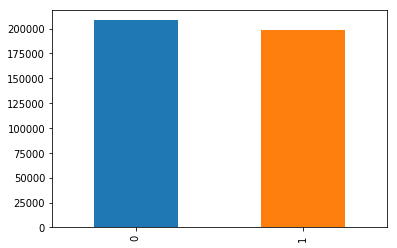

In [11]:
%matplotlib inline

train_data.L.value_counts().plot('bar')

## Drop highly correlated columns.

In [12]:
X_train = train_data.drop(columns='L')
y_train = train_data.L

### Find correlation between all feature columns

In [13]:
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

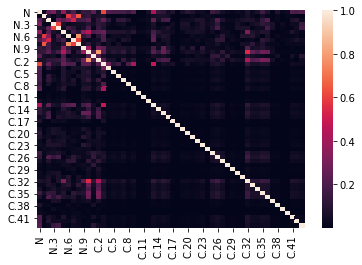

In [14]:
sns.heatmap(data=corr_matrix)

In [15]:
to_drop

[]

- If there are two or more columns that are highly correlated with each other, then it really affects the model's accuracy. But, there are no columns in the given data, that have correlation more than 0.95.<br>
- The 'to_drop' column list is empty.

## Drop duplicates from the train data.

In [16]:
X_train.shape

(406709, 54)

In [17]:
duplicates = X_train.duplicated(keep=False)

In [18]:
X_train[~duplicates].shape

(406709, 54)

- If there are duplicates in the training data, then there is a high chance of overfitting which affects the accuracy/score when tested on new data. Even though the data set has around 4 lakh columns, there are no duplicate rows in the data.<br>
- The shape is same even after removing the duplicates, which says there are no duplicate rows in the data.

## Test data

In [19]:
test_data = pd.read_csv(PATH_TO_test_data, names=columns_names, header=None)
# Drop Key and Label columns.
X_test = test_data
X_test = X_test.drop(columns=['K', 'L'])

In [20]:
X_test.shape

(174303, 54)

## Function for finding feature importance.

In [22]:
def feature_importance(model, X_train):
    # Find the importance of all the features
    importances = model.feature_importances_
    # Sort the indices based on feature importance.
    indices = np.argsort(importances)[::-1]
    features = X_train.columns
    important_features = []
    important_features_scores = []
    for index in indices:
        important_features.append(features[index])
        important_features_scores.append(importances[index])
    feature_importance_df = pd.Series(data=important_features_scores, index=important_features)
    return feature_importance_df

# <center> Modelling <center>

## Modelling - Finding topmost features that are contributing

### Apply Random Forest classifier on the dataset.

In [25]:
# rfClassifier = RandomForestClassifier()
# model_rf = rfClassifier.fit(X_train, y_train)

with open('models/random_forest_classifier.pkl', 'rb') as file:  
    model_rf = pickle.load(file)

In [27]:
model_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

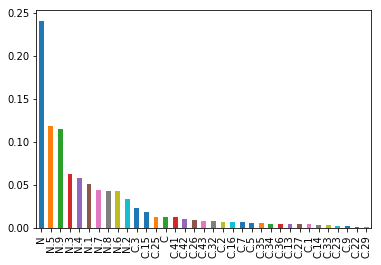

In [28]:
# Plot feature importances
feature_importance_df = feature_importance(model_rf, X_train)
feature_importance_df.iloc[:35].plot('bar')

In [29]:
y_train_pred = model_rf.predict(X_train)
Accuracy = accuracy_score(y_train, y_train_pred) * 100
F1_score = f1_score(y_train, y_train_pred, average='weighted')

In [30]:
Accuracy, F1_score

(99.81313420652113, 0.9981313035487634)

In [31]:
fpr, tpr, _ = metrics.roc_curve(y_train, y_train_pred)

In [32]:
auc = metrics.roc_auc_score(y_train, y_train_pred)
auc

0.9981102605803505

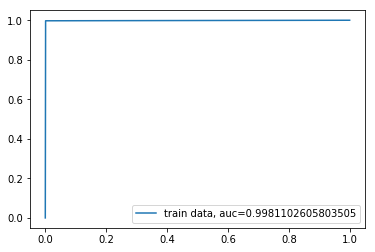

In [33]:
plt.plot(fpr,tpr,label="train data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Apply XGBoost classifier on the dataset.

In [34]:
# xgb = xgboost.XGBClassifier(n_estimators=1500, learning_rate=0.05, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=15)
# model_xgboost = xgb.fit(X_train, y_train)

with open('models/xgboost_classifier.pkl', 'rb') as file:  
    model_xgboost = pickle.load(file)

In [35]:
model_xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=15, min_child_weight=1, missing=nan, n_estimators=1500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

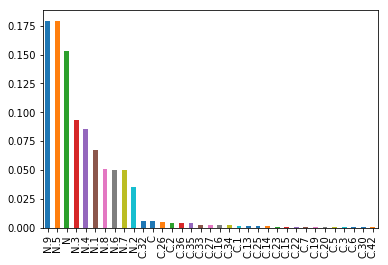

In [36]:
# Plot feature importances
feature_importance_df = feature_importance(model_xgboost, X_train)
feature_importance_df.iloc[:35].plot('bar')

In [37]:
y_train_pred = model_xgboost.predict(X_train)
Accuracy = accuracy_score(y_train, y_train_pred) * 100
F1_score = f1_score(y_train, y_train_pred, average='weighted')

In [38]:
Accuracy, F1_score

(100.0, 1.0)

In [39]:
fpr, tpr, _ = metrics.roc_curve(y_train, y_train_pred)

In [40]:
auc = metrics.roc_auc_score(y_train, y_train_pred)
auc

1.0

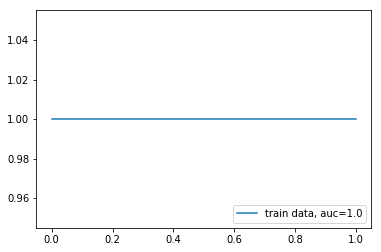

In [41]:
plt.plot(fpr,tpr,label="train data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Feature selection

- I have analysed the topmost features that are contributing to classify the data for both the algorithms separately. 
- Based on the intuition after seeing the feature importance of the features, I have chosen top 27 features from the XGBoost and top 34 features from the random forest. 
- After combining(union) the features, I was left with 34 unique feature columns. 
- This helped me to remove the unnecessary features from the data and reduced the feature set from 54 to 34.

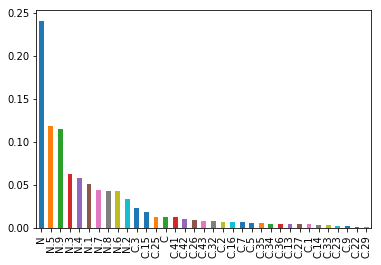

In [43]:
fimp_rf = feature_importance(model_rf, X_train)
fimp_rf.iloc[:35].plot('bar')

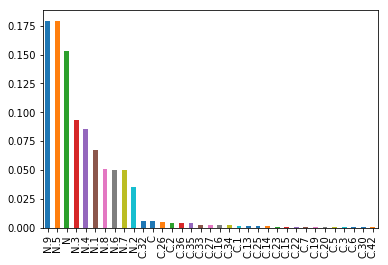

In [44]:
fimp_xgboost = feature_importance(model_xgboost, X_train)
fimp_xgboost.iloc[:35].plot('bar')

In [45]:
imp_feature_columns = list(set(list(fimp_rf.head(34).index) + list(fimp_xgboost.head(27).index)))
X_train_imp = X_train.loc[:, imp_feature_columns]

In [46]:
X_train.shape

(406709, 54)

In [47]:
X_train_imp.shape

(406709, 34)

## Modelling - Tuning hyperparameters

- Random forest couldn't increase the score than before. It was almost the same as I got before considering top features.
- LightGBM worked well and increased the score a lit bit after tuning the hyperparameters and the model was run for 1,00,000 iterations.
- XGBoost outperformed all the models that I have trained. After trying a different set of hyperparameters based on the intuition, I was able to increase the score.
--------------
- I have trained XGBoost of 2 different set of hyperparameters(which gave me a score of 0.96657 and 0.96659). The final submission scores is the mean of the both predictions(Score: 0.96660).
--------------
- Uncomment and run the below cells which produces the prediction file which was uploaded.

In [48]:
# First model - 0.96657
# xgb = xgboost.XGBClassifier(n_estimators=1800, learning_rate=0.1, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=20)
# model_1 = xgb.fit(X_train_imp, y_train)

# Second model - 0.96659
# xgb = xgboost.XGBClassifier(n_estimators=2600, learning_rate=0.05, gamma=0, subsample=0.60, colsample_bytree=1, max_depth=80)
# model_2 = xgb.fit(X_train_imp, y_train)

### Only consider the top most features that were selected from the test data during prediction.

In [49]:
# X_test_imp = X_test.loc[:, imp_feature_columns]

# Model 1
# y_test_proba = model_1.predict_proba(X_test_imp)
# probabilities_of_class_one = y_test_proba[:, 1]

# y_test = pd.DataFrame({'key': test_data.K, 'score': probabilities_of_class_one})
# y_test.to_csv('predictions_1.csv', index=False)

# Model 2
# y_test_proba = model_2.predict_proba(X_test_imp)
# probabilities_of_class_one = y_test_proba[:, 1]

# y_test = pd.DataFrame({'key': test_data.K, 'score': probabilities_of_class_one})
# y_test.to_csv('predictions_2.csv', index=False)

### Load the saved predicitons files

In [54]:
pred_1 = pd.read_csv("predictions_1.csv")
pred_2 = pd.read_csv("predictions_2.csv")

# Mean of both the predictions.
new_pred = ((pred_1.score + pred_2.score)/2)

final_predictions = pd.DataFrame({'key': pred_1.key, 'score': new_pred})
final_predictions.to_csv('final_predictions.csv', index=False)

### Final predictions (Score: 0.96660)

In [56]:
final_predictions.head()

,key,score
0,258918,0.972504
1,258134,0.998101
2,165265,0.945685
3,522141,0.999853
4,569662,0.999923
